# Simple Linear Regression With SKLearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Load the Data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Declaring variables

In [3]:
x = data['SAT']
y = data['GPA']

In [7]:
x.shape

(84,)

In [8]:
y.shape

(84,)

In [9]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

# Regression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R.squared:

In [14]:
reg.score(x_matrix, y)
#it should be exactly same as we got with statsmodels. Also, 0.406

0.40600391479679765

### Coefficients:

In [16]:
reg.coef_
#It should be exactly same as we got with statsmodels. ~0.0017

array([0.00165569])

### Intercept:

In [17]:
reg.intercept_
#Like statsmodels ~ 0.2750

0.27504029966028076

# Predicting

In [19]:
reg.predict([[1740]])

array([3.15593751])

In [20]:
# We can also predict whole data frame.
new_data = pd.DataFrame(data=[1700,1650,1480,1280], columns = ['SAT'])
new_data

,SAT
0,1700
1,1650
2,1480
3,1280


In [21]:
reg.predict(new_data)

array([3.08970998, 3.00692558, 2.72545861, 2.394321  ])

In [22]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1700,3.089710
1,1650,3.006926
2,1480,2.725459
3,1280,2.394321


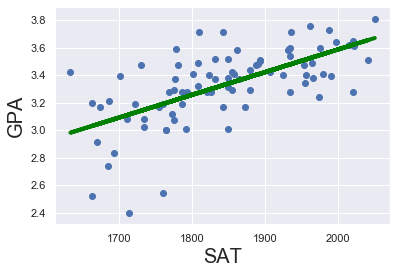

In [27]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='green')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()